# Linear Regression with One Variable

## Setup

In [1]:
%matplotlib inline

## Plotting the Data

In [2]:
import pandas as pd

data = pd.read_csv("./day.csv")
temps = data['atemp'].values
rentals = data['cnt'].values / 1000

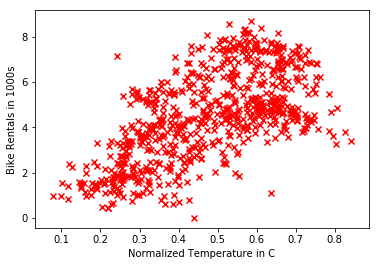

In [3]:
import matplotlib.pyplot as plt

def plot(x, y, theta=None):
    plt.scatter(x, y, marker='x', color='red')
    plt.xlabel('Normalized Temperature in C')
    plt.ylabel('Bike Rentals in 1000s')
    
plot(temps, rentals)

## Gradient Descent

### Cost Function

In [4]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)
    J = 1/(2 * m) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [5]:
theta = np.zeros(2)
X = np.array([[1, t] for t in temps])
y = rentals

compute_cost(X, y, theta)

12.018406441176468

### Gradient Descent

In [6]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        theta0 = theta[0] - alpha * (1/m) * np.sum(np.dot(X, theta) - y)
        theta1 = theta[1] - alpha * (1/m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta[0] = theta0
        theta[1] = theta1

In [7]:
theta = np.zeros(2)
iterations = 5000
alpha = 0.1

gradient_descent(X, y, theta, alpha, iterations)
print(theta)

[ 0.94588081  7.50171673]


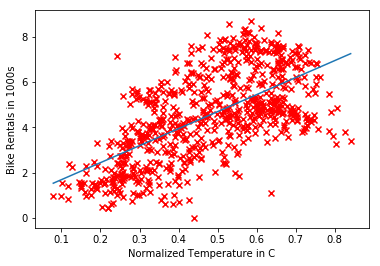

In [8]:
def plot_regression(x, y, theta):
    plot(x, y)
        
    samples = np.linspace(min(x), max(x))
    plt.plot(samples, theta[0] + theta[1] * samples)
    
plot_regression(temps, rentals, theta)

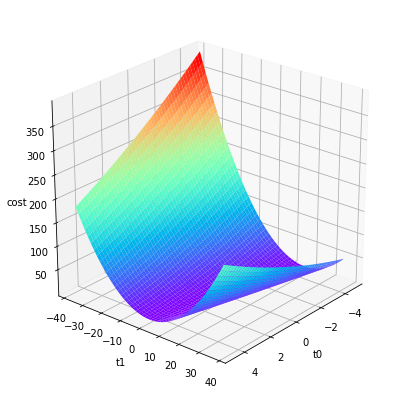

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def surface(x, y, z):
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca(projection="3d")
    ax.set_xlabel(r't0')
    ax.set_ylabel(r't1')
    ax.set_zlabel(r'cost')
    ax.view_init(elev=25, azim=40)
    ax.plot_surface(x, y, z, cmap=cm.rainbow)
    
Xs, Ys = np.meshgrid(
    np.linspace(-5 * theta[0], 5 * theta[0], 50),
    np.linspace(-5 * theta[1], 5 * theta[1], 50)
)

Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = Zs.reshape(Xs.shape)
    
surface(Xs, Ys, Zs)

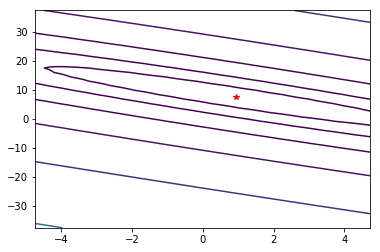

In [10]:
def contour(x, y, z, theta, space):
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(theta[0], theta[1], 'r*')
    plt.contour(x, y, z, space)
    plt.show()
    
contour(Xs, Ys, Zs, theta, np.logspace(-3, 3, 15))

## Feature Normalization

In [11]:
X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])

In [12]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs
    
    return normalized

    
Xn = feature_normalize(X)
Xn = np.append(np.ones((len(Xn),1)), Xn, axis=1)
print(Xn.shape)
print(Xn)

(731, 4)
[[ 1.         -0.67994602  1.25017133 -0.38789169]
 [ 1.         -0.74065231  0.47911298  0.74960172]
 [ 1.         -1.749767   -1.33927398  0.74663186]
 ..., 
 [ 1.         -1.42434419  0.87839173 -0.85355213]
 [ 1.         -1.49004895 -1.01566357  2.06944426]
 [ 1.         -1.54048197 -0.35406086 -0.46020122]]


In [18]:
def gradient_descent_multi(X, y, theta, alpha, n):
    history = np.zeros(n)
    m = len(X)
    theta_final = theta
    for i in range(n):
        #print('*******')
        #print('X:', X.shape)
        deltas = np.dot(X, theta) - y
        #print('deltas:', deltas.shape)
        
        theta_ = np.zeros(len(theta))
        for f in range(len(theta)):
            adj = alpha * (1/m) * np.sum(deltas * X[:,f])
            theta_[f] = theta[f] - adj
        theta = theta_
        theta_final = theta
        #print(theta)
    return theta_final
        
        

        #theta0 = theta[0] - alpha * (1/m) * np.sum(np.dot(X, theta) - y)
        #theta1 = theta[1] - alpha * (1/m) * np.sum((np.dot(X, theta) - y) * X[:,1])

alpha = 0.01
iterations = 3000
theta = np.zeros(4)
print(gradient_descent_multi(Xn, y, theta, alpha, iterations))

from numpy.linalg import inv
#print(Xn)
#print(y)

def gradient_descent_multi_vectorized(X, y):
    inverse = inv(X.T.dot(X))
    dot2 = X.T.dot(y)
    final = dot1.dot(X.T).dot(y)
    
    
    return final

gradient_descent_multi_vectorized(Xn, y)


[ 4.50434884  1.22203893 -0.45083331 -0.34166068]


NameError: name 'dot1' is not defined